In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set_style("whitegrid")

In [7]:
%matplotlib inline

In [8]:
from sklearn.datasets import load_boston

In [9]:
import sklearn

In [10]:
from sklearn.linear_model import LinearRegression

## Supervised Learning: Linear Regression

This project uses a toy dataset that is built into scikit-learn as a way to learn more 
about supervised learning. Specifically, the project provides practice for diving into 
linear regression in a hands-on way. This will be done by using the fit method to train 
the regressor and also using the predict method to predict new labels.

The project uses [the UC Irvine/StatLib/Carnegie Mellon University’s Boston “Housing Data 
Set”](https://archive.ics.uci.edu/ml/datasets/Housing). That dataset was imported just above.

----------

To load the dataset below, an object will be made called “boston” and it will be set equal 
to the imported dataset.

In [11]:
boston = load_boston()

It is possible to use the special describe method (boston.DESCR) that scikit-learn built 
into this dataset to see what the dataset contains. That will be done below.

In [12]:
print (boston.DESCR) # The median value will be treated as the target/label. 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

A histogram with the target/label of the dataset (median home value) will be plotted below. 
The histogram will be made by calling the target method. 50 bins will be allotted because 
the dataset contains 506 different housing instances.

	Being able to call a target value simply by calling the target method is something that is easily allowed for when working with toy datasets in scikit-learn. However, it’s not the standard way of being able to plot a histogram - it is understood that this is a shortcut.

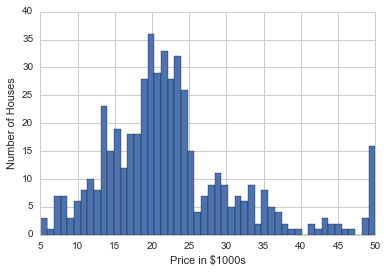

In [13]:
plt.hist(boston.target, bins = 50);

plt.xlabel("Price in $1000s");
plt.ylabel("Number of Houses");

It would be interesting to see a scatterplot of a single feature versus the target/label. 
Next, that will be done by making a scatterplot of the median home value versus the number 
of rooms in the home. 

The dataset provides an attribute that allows for easily getting the number of rooms.  “RM” 
is the label for the average number of rooms per dwelling. All of the attribute information 
was given in order, and the room attribute is the sixth down from the top, so it likely has 
an index number of 5. Calling the column at the #5 index of the Boston dataset should return 
the information needed.

Below, to get started, a scatterplot method will be called in the same way as the above 
histogram was made - via the target method being called on the dataset. Then a request for 
every attribute in the 5th column will be given to serve as the x-axis (the average number 
of rooms). Median home value (“Price in $1000s”) will be along the y-axis.

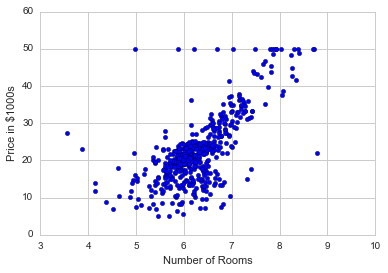

In [14]:
plt.scatter(boston.data[:, 5], boston.target);

plt.ylabel("Price in $1000s");
plt.xlabel("Number of Rooms");

The scatterplot shows a trend - the price increases along with the number of rooms in a house. 
That makes sense considering it is typically the case that more rooms equals a bigger house 
equals likely a greater real estate value. 

Next, the same scatterplot will be replicated by first using Pandas to transform the Boston 
dataset into a DataFrame. And then, Seaborn will be used to perform an lmplot on that DataFrame 
to try to reproduce the scatterplot, but with a linear-fit line included as well.

To begin that, an object will be made called bostonDataFrame. Then, the data will be reset as a 
Pandas DataFrame when the DataFrame method is called on just the data of the Boston dataset, 
not on the actual target/label itself. Calling the DataFrame method in this way is another thing 
that the toy dataset allows for as a way to keep things convenient.

In [15]:
bostonDataFrame = DataFrame(boston.data)

Below, the columns in the DataFrame will be set equal to the feature names method (which is yet 
another thing that the toy dataset allows for).

In [16]:
bostonDataFrame.columns = boston.feature_names

In [17]:
bostonDataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Next, the target/label of the Boston dataset (the median home value, or price) will be added. 
That will be done by creating a new column in the DataFrame and calling it “Price” then 
setting that equal to the target/label of the DataFrame. Setting the target/label will be done 
by passing the target method.

In [18]:
bostonDataFrame["Price"] = boston.target

In [19]:
bostonDataFrame.head()  # ... checking for the new "Price" column

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Seaborn’s built-in functionality means that it can be used to do a linear fit or linear 
regression automatically. This means not needing to manually calculate out the best fit 
line/least squares line.

Below, the lmplot function will be used to call a linear plot that will create a linear 
regression over the scatterplot. It will plot the room feature versus the median home 
value, and the data will be set as that DataFrame.

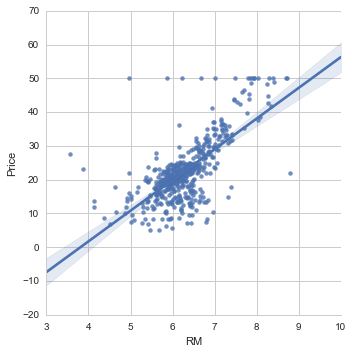

In [20]:
sns.lmplot("RM", "Price", data = bostonDataFrame)

It is possible to manually recreate the above Seaborn plot - it is a simple linear regression. 
Seaborn did that automatically, but it is also possible to use matrix tricks and Numpy’s least 
squares method to achieve the same result. 

So next, Numpy will be used to create a univariate linear regression whereby one data type (number 
of rooms, in this case) will be fit it to another (the average home value data - which is serving 
as the target data/label). To start, the x and y arrays will be set for Numpy to take in. 

An important note for the x array is that Numpy expects to take in a two-dimensional array. The 
first dimension is made up of different example values, and the second dimension is the attribute 
number. In this case, the value will be the mean number of rooms per house. That value is a single 
attribute, so the second dimension of the array will be just 1. All of this means that a (506,1) 
shape array will need to be created (506 because the description of the Boston data set had 506 
attributes for each feature).  

There are a few ways to do this, but an easy way to do this is by using Numpy's built-in vertical 
stack tool - the vstack method.

To begin the algorithmic stuff, X and Y will be set. Said differently, the X and Y being given to 
Numpy will make it possible to use that information to create a single-variable linear regression. 
X will be set to the median of the room value by calling the RM column within the “bostonDataFrame” 
DataFrame). That will simply create a series of all of that column’s data points (or a "(506L, )" ).

In [21]:
X = bostonDataFrame.RM

Numpy’s linear algebra library needs to have the information in a manner where it knows all of the 
features and then how many attributes they actually are. In order to do that below, X will be set 
equal to numpy.vstack to use the vstack method. Then, that vstack method will be called on the RM 
column. Doing that will convert the information into the (506L, 1L) form.

In [22]:
X = np.vstack(bostonDataFrame.RM)

The Y will be set to the label/target - median home value. That set will be made by calling the 
price column that was created earlier. 

In [23]:
Y = bostonDataFrame.Price

“y = mx + b” is the equation for a line. But that equation will need to be rewritten using 
matrices. The equation then ultimately becomes [A = [x  1]](http://docs.scipy.org/doc/numpy-1.3.x/reference/generated/numpy.linalg.lstsq.html).

To use Numpy to start creating that A matrix, a matrix in the form of [X  1] will be needed. 
Every value in the original X that was made above will need to be called. List comprehension 
will be used (instead of a for loop) to make the needed 1 by 2 array ( “[X  1]“).

Below, list comprehension will build a list whereby “for every value in X (so going through 
the x array), set the array up as the ‘value, 1’ “, so that it matches the A = [X  1] matrix. 
Then an array will be made of all of those values. Specifically, "numpy.array" will be used 
to transform the list that was created by list comprehension into an array. Doing this will 
attach the 1 in the [X  1] part of the equation, and that 1 is needed because Numpy needs to 
know how many attributes it will be working with. And, in this case, it’s just a simple, 
single-variable linear regression, so there is just 1 attribute (the average number of rooms). 

In [24]:
X = np.array( [ [value, 1] for value in X ] )

Having set up the above has provided all that is needed in order to get best fit values. Below, 
two new objects will be set up (m and b) for the best fit line. Then, the least squares method 
(lstsq) from the linear algebra library (linalg) will be used to call the X and Y values to be 
applied to the objects. Only the first indexed value is needed (the value at “[0]”), so that 
will be stated as well so that everything fits the format that the linear algebra least squares 
method spits it out.

In [25]:
m, b = np.linalg.lstsq(X, Y)[0]

Below, the original format of the Boston information will be used to plot everything together. 
The matrix transformations were only done to make it possible to utilize the Numpy least 
squares method. The code below will create a scatterplot that will make a marker for the 
average number of rooms and the associated median home value.

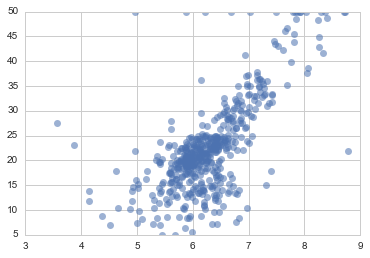

In [26]:
plt.plot(bostonDataFrame.RM, bostonDataFrame.Price, "o", alpha = 0.55)

Below, a yellow best fit line will be plotted. For differentiation, a lower case x will be 
set equal to the room column. Then a plot will be made that uses the x values (the rooms 
column) and the equation of a line whereby the m and b values used are the ones that were 
recently obtained from the Numpy least squares method in the linear algebra library.

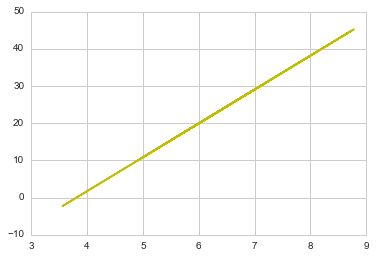

In [27]:
x = bostonDataFrame.RM
plt.plot(x, m*x + b, "y", label = "Best Fit Line")

Below, the two plots will be combined to replicate the Seaborn plot.

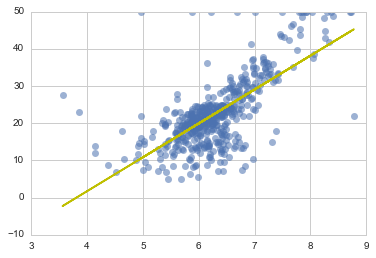

In [28]:
plt.plot(bostonDataFrame.RM, bostonDataFrame.Price, "o", alpha = 0.55);

x = bostonDataFrame.RM
plt.plot(x, m*x + b, "y", label = "Best Fit Line")

The root mean squared error of the line that was just fitted will be found next. The root mean squared error is very similar to the standard deviation, that makes it useful here.

Using [numpy.linanalg.lstsq](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) returns an array that has a total squared error. What that means is that it takes each element and checks the distance between the data point and the fit line (this distance is a variable D). Then it squares that D and all of the other Ds that can be calculated along the fit line. Then it sums up all of those squared distances and then summed. 

Next, to get the error, an object called "result" will be created and the Numpy least squares method (numpy.linalg.lstsq) will be called again on the X and Y that were made earlier. 


In [29]:
result = np.linalg.lstsq(X, Y)

The total error is stored at [K](http://docs.scipy.org/doc/numpy-1.7.0/reference/generated/numpy.linalg.lstsq.html), which is index 1 in this case. So, totalError will be set to result[1].

In [30]:
totalError = result[1]

Next, taking the square root of the "totalError" object and dividing that by the length of X will provide the root mean squared error. Since the error has the same dimension as the variable itself, taking the square root is a way of standardizing the error metric (because RMSE/mean is non-dimensional and also, it is not affected by whatever the choice of unit might be).


In [31]:
rmse = np.sqrt(totalError/len(X))

In [32]:
print ("The root mean squared error was %.2f." %rmse)  # Seeing the results

The root mean squared error was 6.60.


Again, the root mean square error is very similar to the standard deviation. Since the two can be seen as approximately corresponding to one another, it is possible to say that the median home value is going to be at least within 2 times the root mean square error value. Or, said differently, the median home value is *not likely* to vary more than 2 times the root mean square error value 95% of the time. That means that a median home value can reasonably be expected to be within \$13,200 of the fit line (because the figures from the dataset were given in $1000s, and the RMSE was 6.60). 

-----------


A linear regression object will be created below. 

In [33]:
linReg = LinearRegression()

To begin the multivariable regression analysis, the “bostonDataFrame” will be separated back into data columns and the target column. 

This will be done below by setting “XMulti” as the “bostonDataFrame”  DataFrame, but with the median home value dropped. Also a 1 index will be passed because, in order to drop a column, a 1 index needs to be passed. Doing this will create a situation where XMulti is equal to everything in the “bostonDataFrame” minus the median home value. 

In [34]:
XMulti = bostonDataFrame.drop("Price", 1)  # Data columns

The YTarget is going to be set equal to “bostonDataFrame.Price” to have the YTarget be only equal to the median home value. 

In [35]:
YTarget = bostonDataFrame.Price

Next, the X and Y will be passed into the fit method using the linear regression object that was made earlier.

In [36]:
linReg.fit(XMulti, YTarget)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Below, the intercept will be checked and the result will be printed.

In [37]:
print ("The estimated intercept coefficient is %.2f." %linReg.intercept_)

The estimated intercept coefficient is 36.49.


Below, the intercept will be checked by calling the length of the linear regression coefficient method then the result will be printed.

In [38]:
print ("The number of coefficients used was %d." % len(linReg.coef_))

The number of coefficients used was 13.


The above results show that essentially, an equation for a line has been made but, instead of it having just one coefficient m and an intercept b, it now has 13 coefficients. The end result of this is the creation of a line that, instead of having it equate to only mx + b ( [w1x1](http://scikit-learn.org/stable/modules/linear_model.html) it goes all the way up to 13 coefficients… because 13 different types of data variables are being used)… 

In [39]:
coeffDataFrame = DataFrame(bostonDataFrame.columns)

Next, a DataFrame will be created for showing all of the Features and their estimated coefficients obtained from that fit that was done earlier - that linear regression. 

At this stage, what is happening is scikit-learn is doing everything that was manually done earlier in Python using Numpy. But scikit-learn is instead doing those things in one simple step with this fit method. 


In [40]:
coeffDataFrame.columns = ["Features"]

Below, a new column named “Coefficient Estimate” will be made for lining up the coefficients from the linear regression. It will be equal to a series of Pandas of the coefficient method.

In [41]:
coeffDataFrame["Coefficient Estimate"] = pd.Series(linReg.coef_)

In [42]:
coeffDataFrame  # Checking

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Just like what was initially plotted earlier, the coefficients show that the highest one (3.80) corresponds with the average number of rooms. So it seems that it’s the highest-correlated feature between a particular data feature and a home’s price.

---------

Next, the cross validation library from scikit-learn will be called for use with doing the train_test_split analysis. The data that will be used for that will be the X data that was made earlier (the X array) and the target (the Price). Scikit-learn will take all of the X information and all of the Y information (and in this case, it is going to be the multivariate information) and split it up into a training set and a testing set and there will be an X and Y for each of those respectively. Then, it is going to output 4 things: the X training and X testing, then the Y training and Y testing. 

In [43]:
XTrain, XTest, YTrain, YTest = sklearn.cross_validation.train_test_split(X, bostonDataFrame.Price)

In [44]:
print (XTrain.shape, XTest.shape, YTrain.shape, YTest.shape)

(379, 2) (127, 2) (379,) (127,)


In [45]:
linReg = LinearRegression()

Below, the training data will be fit to the linear regression that was just created above.

In [46]:
linReg.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Next, a prediction will be called on both the X training and testing set. This will be done by calling a prediction method on the XTrain and setting that equal to an object called predTrain (for “prediction train”). The same will be done for the testing set. Afterwards, they will be checked to see how well the training sets match the testing sets. 

In [47]:
predTrain = linReg.predict(XTrain)

In [48]:
predTest = linReg.predict(XTest)

Below, the mean squared error (MSE) will be taken - model will be fit with the training dataset and the the MSE will be calculated with the X testing set and the Y testing set. It will be a similar process as earlier except that it will be done with the Y testing data and the linear regression prediction from the testing that was done on the X testing data (i.e. - the prediction object that was made earlier). 

To print out the MSE, the difference will be taken between "YTrain" and the prediction that was made earlier from the training set. After that is taken, it will be squared and then the mean of that result will be taken. Numpy’s mean method will be used to do that. 


In [49]:
print ("Fit a model XTrain, and calculate MSE with YTrain: %.2f."  % np.mean((YTrain - predTrain) ** 2))

Fit a model XTrain, and calculate MSE with YTrain: 44.57.


In [50]:
print ("Fit a model XTrain, and calculate MSE with XTest and YTest: %.2f."  %np.mean((YTest - predTest) ** 2))

Fit a model XTrain, and calculate MSE with XTest and YTest: 40.84.


Next, a scatterplot will be made (or a residual plot) for the training data. Scatterplot “train” will be set equal to plt.scatter with the prediction data from the training set added in. Then, displayed on the Y will be the prediction training minus the Y training (that residual value).

Scatterplot “test” will do the same thing, but with the testing data instead so that it will provide the test prediction (the "predTest" object that was created earlier).

Then a horizontal line will be plotted across at line equal to zero by setting y=0 as an argument.

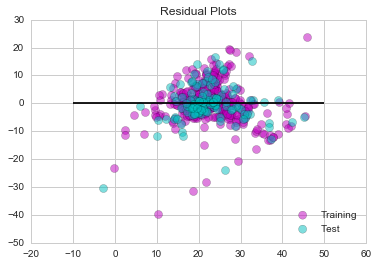

In [51]:
train = plt.scatter(predTrain, (predTrain - YTrain), c = "m", s = 65, alpha = 0.5)

test = plt.scatter(predTest,(predTest - YTest), c = "c", s = 65, alpha = 0.5)

plt.hlines(y = 0, xmin = -10, xmax = 50)

plt.legend((train, test), ("Training", "Test"), loc = "lower right")

plt.title("Residual Plots")

In looking at the scatterplot, it looks like there isn’t any major pattern (and, with there being more that 500 data points, it shows that quite the majority are just scattered randomly around the horizontal line). This sort of visualization is expected. So, in considering whether or not regression was the right choice, it seems that this residual plot supports that. 
